2.9.1
2.9.0


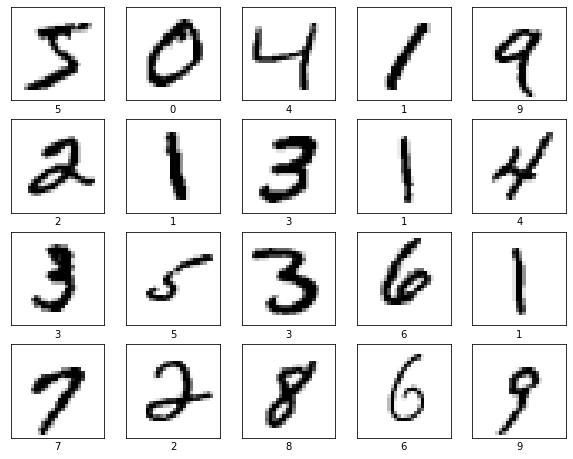

In [1]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout

from keras.callbacks import LearningRateScheduler

import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV

print(tf.__version__)
print(keras.__version__)

# fix random seed for reproducibility
np.random.seed(42)

mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])



In [2]:
# normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# reshape images to 1D so we can just work with dense layers
#For this demo purposes
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

num_classes = 10

# One hot encoding for categorical labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Take a subset of train for grid search. Let us take 10% for now
from sklearn.model_selection import train_test_split
x_grid, x_not_use, y_grid, y_not_use = train_test_split(x_train, y_train, test_size=0.9, random_state=42)


In [3]:
# build the model
input_dim = x_grid.shape[1]


#NOTE: Add default optimizer, otherwise throws error 'optimizer not legal parameter'
def define_model(activation='relu', init_weights='uniform', optimizer='Adam'):   
    model = Sequential()
    model.add(Dense(64, activation=activation, kernel_initializer=init_weights, 
                    input_dim = input_dim)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_weights, activation=activation))
    model.add(Dense(num_classes, kernel_initializer=init_weights, activation='softmax'))
    
    # compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,      
                  metrics=['acc'])
    return model

# implement the Scikit-Learn classifier interface
# requires model defined as a function, which we already have
from keras.wrappers.scikit_learn import KerasClassifier
batch_size = 100
epochs = 10

model = KerasClassifier(build_fn=define_model, 
                        epochs=epochs, 
                        batch_size = batch_size, 
                        verbose=1)

activation = ['softmax', 'relu', 'sigmoid']
#Also try softplus, tanh, linear, hard_sigmoid 
init_weights = ['uniform', 'normal', 'he_uniform']
#Also try lecun_uniform, he_normal, glorot_normal, etc. 
optimizer = ['SGD', 'RMSprop', 'Adam']

param_grid = dict(activation=activation, init_weights=init_weights, optimizer=optimizer)

#n_jobs=4 uses 4 CPUs. Try not to do -1 on your system as it may hang!!!
# -1 refers to using all available CPUs
#Cross validation, cv=3
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=3)

grid_result = grid.fit(x_grid, y_grid)


<ipython-input-3-d238a6f8badd>:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=define_model,


Epoch 1/10
60/60 [==============================] - 1s 2ms/step - loss: 1.2293 - acc: 0.6200
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 0.4602 - acc: 0.8650
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 0.3343 - acc: 0.9042
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.2728 - acc: 0.9182
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.2347 - acc: 0.9290
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.2018 - acc: 0.9435
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.1770 - acc: 0.9485
Epoch 8/10
60/60 [==============================] - 0s 2ms/step - loss: 0.1639 - acc: 0.9522
Epoch 9/10
60/60 [==============================] - 0s 2ms/step - loss: 0.1466 - acc: 0.9567
Epoch 10/10
60/60 [==============================] - 0s 2ms/step - loss: 0.1244 - acc: 0.9633


In [4]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))


Best: 0.930333 using {'activation': 'relu', 'init_weights': 'he_uniform', 'optimizer': 'Adam'}
Mean = 0.112333 (std=0.007487) with: {'activation': 'softmax', 'init_weights': 'uniform', 'optimizer': 'SGD'}
Mean = 0.330833 (std=0.161890) with: {'activation': 'softmax', 'init_weights': 'uniform', 'optimizer': 'RMSprop'}
Mean = 0.445667 (std=0.050912) with: {'activation': 'softmax', 'init_weights': 'uniform', 'optimizer': 'Adam'}
Mean = 0.112333 (std=0.007487) with: {'activation': 'softmax', 'init_weights': 'normal', 'optimizer': 'SGD'}
Mean = 0.323333 (std=0.159168) with: {'activation': 'softmax', 'init_weights': 'normal', 'optimizer': 'RMSprop'}
Mean = 0.462167 (std=0.065219) with: {'activation': 'softmax', 'init_weights': 'normal', 'optimizer': 'Adam'}
Mean = 0.100333 (std=0.002014) with: {'activation': 'softmax', 'init_weights': 'he_uniform', 'optimizer': 'SGD'}
Mean = 0.648167 (std=0.150515) with: {'activation': 'softmax', 'init_weights': 'he_uniform', 'optimizer': 'RMSprop'}
Mean = 0